**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://github.com/wncc/Machine-Learning-LS-24/raw/main/Week%203/Assignment/OpenCV/images.zip --quiet

In [3]:
!unzip -q images.zip

Add ```/path/to/your/folder``` to load the images

In [4]:
cartoon = cv2.imread("/content/cartoon.bmp")
cartoon_y = cv2.imread("/content/cartoon_y.jpg")
girl = cv2.imread("/content/girl.png") #grayscale image
girl_y = cv2.imread("/content/girl_y.jpg")
fingerprint = cv2.imread("/content/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

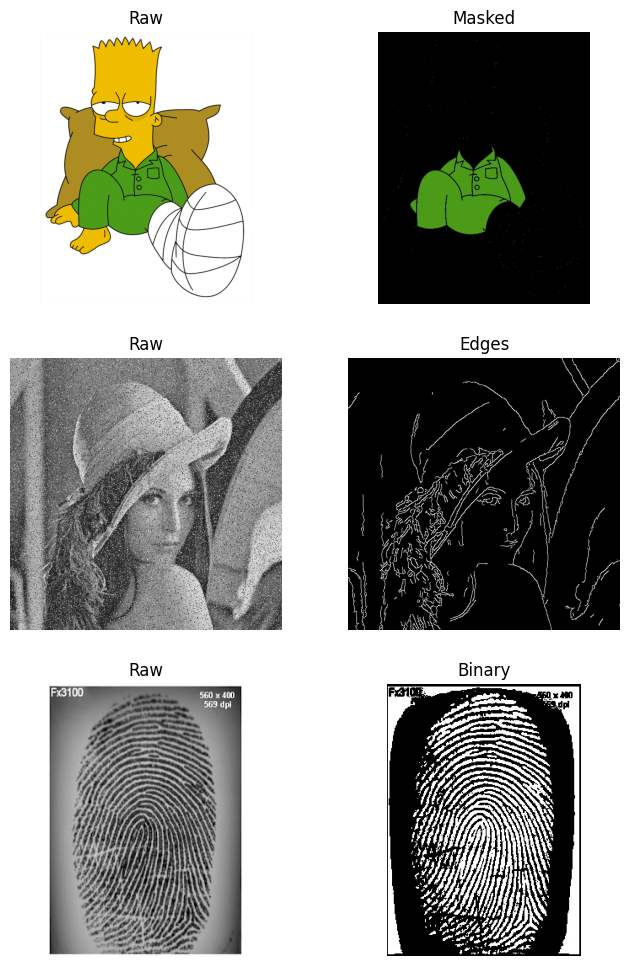

In [5]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [6]:
cartoon_rgb = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)
cartoon_hsv = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)

# the colour to mask
color_to_mask_rgb = [74, 157, 54]

# converted RGB to BGR format for OpenCV
color_to_mask_bgr = [color_to_mask_rgb[2], color_to_mask_rgb[1], color_to_mask_rgb[0]]

def get_limits(color):
    c = np.uint8([[color]])  # BGR values
    hsvC = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)

    hue = hsvC[0][0][0]

    # determining HSV limits
    lowerLimit = np.array([hue - 10, 50, 50], dtype=np.uint8)
    upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)

    return lowerLimit, upperLimit

# now getting the color limits for masking
lower_limit, upper_limit = get_limits(color_to_mask_bgr)

# created a mask based on HSV range
mask = cv2.inRange(cartoon_hsv, lower_limit, upper_limit)

# converted the mask to 3-channel format for visualization
mask_3d = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# applying the mask to the RGB image
cartoon_y_mentee = cv2.bitwise_and(cartoon_rgb, mask_3d)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [7]:
girl_gray = cv2.cvtColor(girl, cv2.COLOR_BGR2GRAY)

# applied the Gaussian Blur to reduce the noise
girl_blur = cv2.GaussianBlur(girl_gray, (9, 9), 0)

# apploed the basic Canny edge detection
img_edge = cv2.Canny(girl_blur, 35, 140)

# dilate the edges
girl_y_mentee = cv2.dilate(img_edge, np.ones((2, 2), dtype=np.int8))

# erode the dilated edges
girl_y_mentee = cv2.erode(girl_y_mentee, np.ones((2, 2), dtype=np.int8))

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [8]:
#START CODE HERE (Do all your processing here)

# converted the fingerprint image to a binary one
fingerprint_gray = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)

# applied a binary threshold
_, fingerprint_y_mentee = cv2.threshold(fingerprint_gray, 128, 255, cv2.THRESH_BINARY)

# then inverted the image as the comparison file is inverted
fingerprint_y_mentee = cv2.bitwise_not(fingerprint_y_mentee)

## Comparison

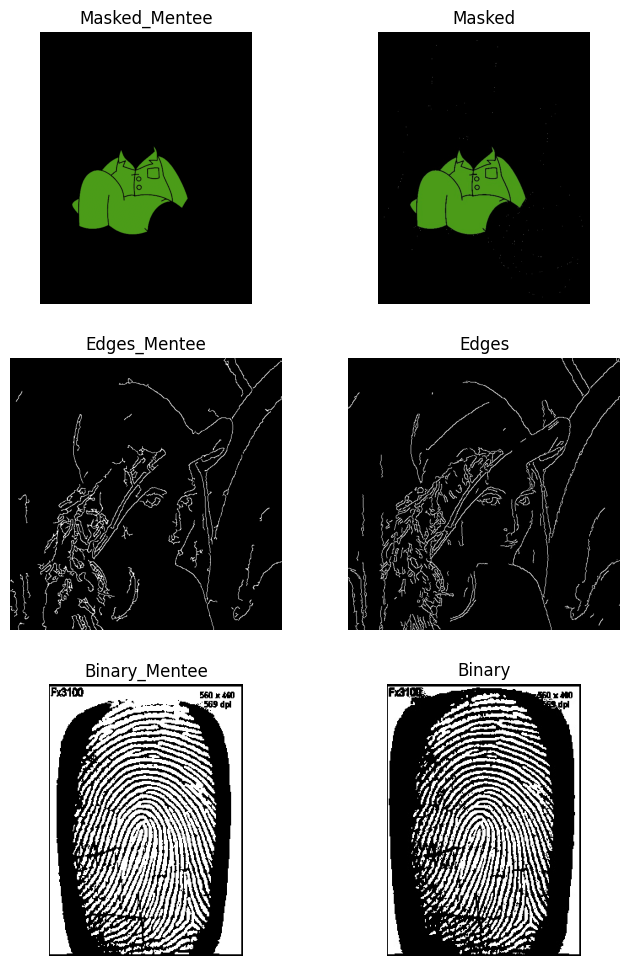

In [9]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()